In [ ]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import datetime
import fix_yahoo_finance as yf
yf.pdr_override() 

%matplotlib inline

In [ ]:
start = datetime.datetime.now() - datetime.timedelta(days = 365 * 5)
end = datetime.datetime.now()

In [ ]:
# Bank of America
BAC = data.get_data_yahoo("BAC", start, end)

# Citigroup
C = data.get_data_yahoo("C", start, end)

# Goldman Sachs
GS = data.get_data_yahoo("GS", start, end)

# JP Morgam
JPM = data.get_data_yahoo("JPM", start, end)

# Morgan Stanley
MS = data.get_data_yahoo("MS", start, end)

# Wells Fargo
WFC = data.get_data_yahoo("WFC", start, end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [ ]:
tickers  = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [ ]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)

In [ ]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [ ]:
bank_stocks.head()

Bank Ticker    BAC                ...        WFC                     
Stock Info    Open   High    Low  ...      Close  Adj Close    Volume
Date                              ...                                
2016-06-17   13.38  13.53  13.28  ...  46.599998  39.822365  25661300
2016-06-20   13.74  13.85  13.51  ...  46.930000  40.104355  19490100
2016-06-21   13.62  13.65  13.45  ...  47.230000  40.360729  11731600
2016-06-22   13.60  13.78  13.59  ...  46.970001  40.138554  17072100
2016-06-23   13.84  14.05  13.82  ...  47.910000  40.941830  16270000

[5 rows x 36 columns]

In [ ]:
bank_stocks.xs(key='Close', axis = 1, level='Stock Info').max()

Bank Ticker
BAC     43.270000
C       81.910004
GS     391.450012
JPM    166.440002
MS      93.959999
WFC     65.930000
dtype: float64

In [ ]:
returns = pd.DataFrame()

In [ ]:
for ticker in tickers:
  returns[ticker + ' Return'] = bank_stocks[ticker]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2016-06-17,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-20,0.010448,0.007533,0.014488,0.001445,0.023311,0.007082
2016-06-21,0.005908,0.002804,0.004061,0.009299,0.011583,0.006392
2016-06-22,-0.000734,-0.005592,-0.001416,-0.003813,0.007252,-0.005505
2016-06-23,0.031594,0.041706,0.030512,0.021368,0.034104,0.020013


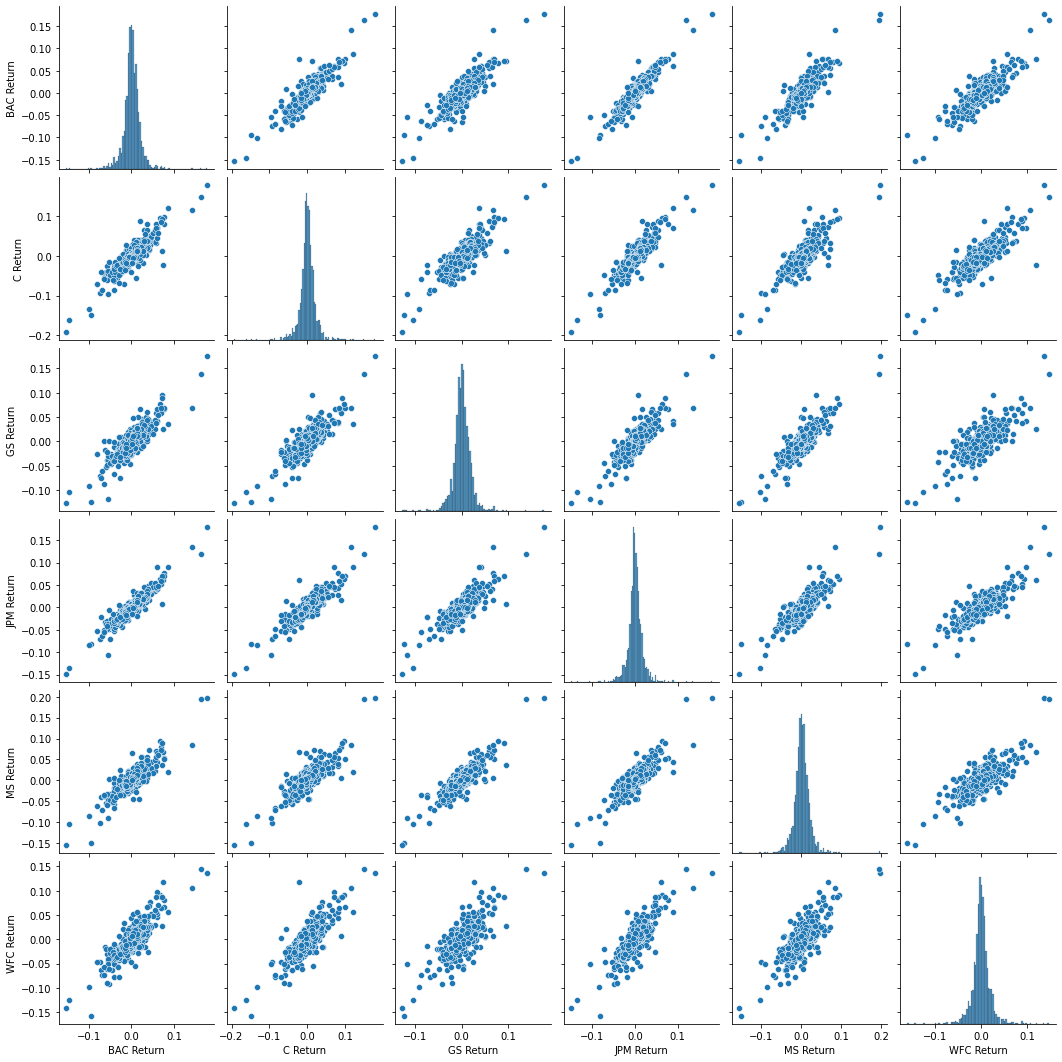

In [ ]:
import seaborn as sns

sns.pairplot(returns[1:])

In [ ]:
returns.idxmin()

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

In [ ]:
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

In [ ]:
returns.std()

BAC Return    0.021463
C Return      0.023261
GS Return     0.019893
JPM Return    0.018962
MS Return     0.021452
WFC Return    0.021567
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


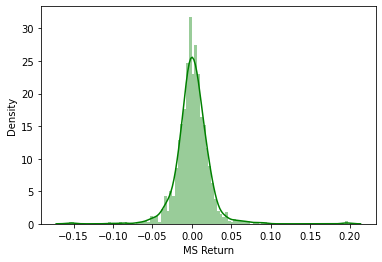

In [ ]:
sns.distplot(returns.loc['2017-01-01':]['MS Return'], color = 'green', bins = 100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


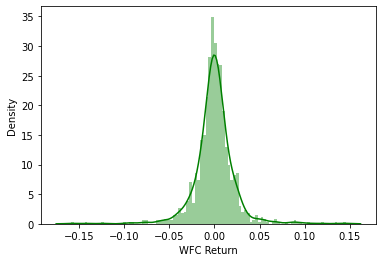

In [ ]:
sns.distplot(returns.loc['2017-01-01':]['WFC Return'], color = 'green', bins = 100)

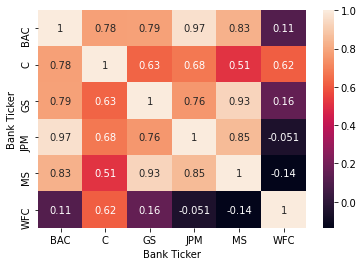

In [ ]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

In [ ]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

import plotly
import cufflinks as cf
cf.go_offline()

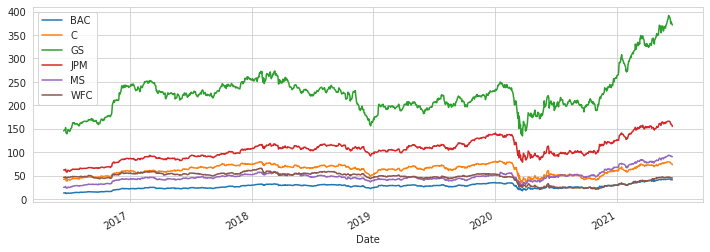

In [ ]:
for ticker in tickers:
  bank_stocks[ticker]['Close'].plot(figsize=(12,4), label = ticker)
plt.legend()

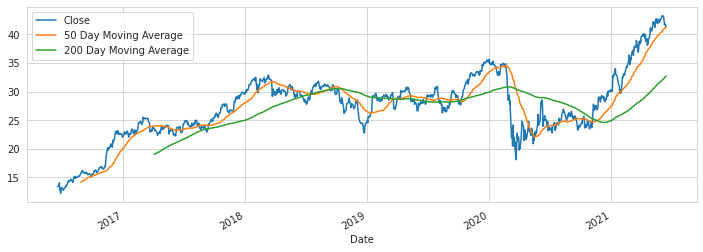

In [ ]:
plt.figure(figsize=(12,4))
BAC['Close'].plot(label = 'Close')
BAC['Close'].rolling(window=50).mean().plot(label = '50 Day Moving Average')
BAC['Close'].rolling(window=200).mean().plot(label = '200 Day Moving Average')
plt.legend()

In [ ]:
# Gamestop
GME = data.get_data_yahoo("GME", start, end)

[*********************100%***********************]  1 of 1 downloaded


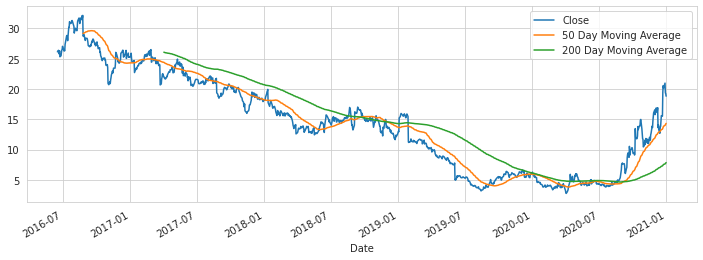

In [ ]:
plt.figure(figsize=(12,4))
GME['Close'].loc[:'2020-12-31'].plot(label = 'Close')
GME['Close'].loc[:'2020-12-31'].rolling(window=50).mean().plot(label = '50 Day Moving Average')
GME['Close'].loc[:'2020-12-31'].rolling(window=200).mean().plot(label = '200 Day Moving Average')
plt.legend()

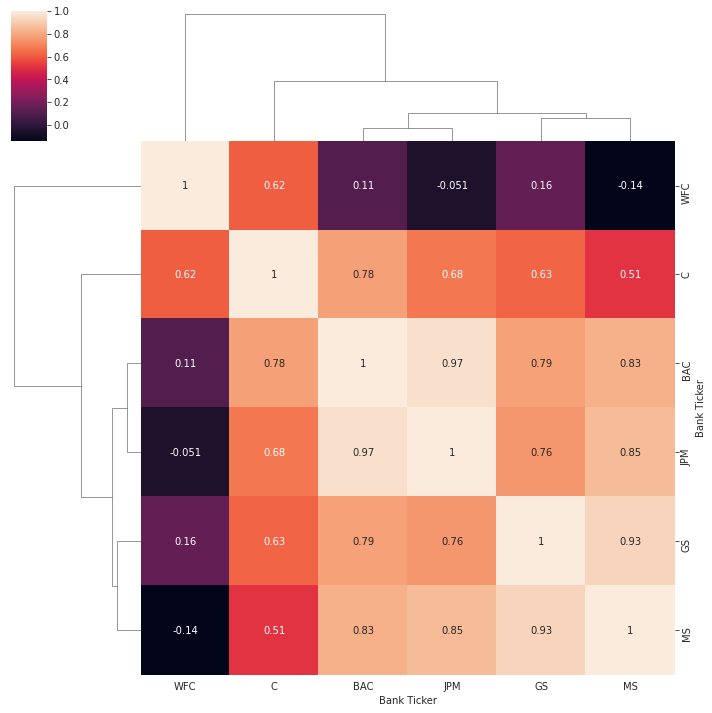

In [ ]:
sns.clustermap(bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').corr(), annot = True)

In [ ]:
import plotly

In [ ]:
GS[['Open', 'High', 'Low', 'Close']].loc['2020-06-15':].iplot(kind = 'candle')

In [ ]:
GS[['Open', 'High', 'Low', 'Close']].loc['2020-06-15':]

,Open,High,Low,Close
Date,,,,
2020-06-15,195.729996,206.990005,195.149994,206.309998
2020-06-16,214.979996,214.979996,203.729996,209.589996
2020-06-17,210.000000,210.789993,205.440002,206.190002
2020-06-18,203.990005,207.259995,202.669998,203.839996
2020-06-19,207.050003,207.419998,200.970001,201.630005
...,...,...,...,...
2021-06-09,383.160004,384.269989,378.880005,382.779999
2021-06-10,389.640015,389.640015,372.350006,373.940002
2021-06-11,375.700012,378.750000,375.109985,378.049988
